# Final Test Project

In this activity, we'll use the *Breast Cancer Diagnosis* dataset that we used in *Chapter 5, Classification Techniques* (refer to *Activity 5.04, Breast Cancer Diagnosis Classification Using Artificial Neural Networks* for dataset details), to solve a binary classification problem wherein we have to predict whether the breast cell is benign or malignant given the features. In this problem, we want to maximize our recall; that is, we want to be able to identify all malignant cells, because if we miss any of those, we could detect no cancer, when there actually is cancer. And, we do not want to end up in that scenario.

We will use a gradient boosting classifier from scikit-learn to train the model. This activity is intended as a final project that will help consolidate the practical aspects of the concepts learned in this course, and particularly in this chapter.

We will find the most optimal set of hyperparameters for the model by using random search with cross-validation. Then, we will build the final classifier using the gradient boosting algorithm on a portion of the dataset and evaluate its performance using the classification metrics we have learned about on the remaining portion of the dataset. We will use precision and recall as the evaluation metric for this activity.

## 1. Import the relevant libraries.

In [83]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, train_test_split
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, confusion_matrix,
                             precision_recall_curve)

## 2. Read the breast-cancer-data.csv dataset.

In [84]:
df = pd.read_csv('../Datasets/breast-cancer-data.csv')
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [86]:
# convert target
diag = {"malignant": 1, "benign": 0}
df.diagnosis = df.diagnosis.map(diag)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [87]:
# scale
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled, columns=df.columns)
df_scaled

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667,1.0
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315,1.0
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909,1.0
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315,1.0


## 3. Split the dataset into training and test sets.

In [88]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=1)

In [89]:
df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
408,0.521037,0.370308,0.511437,0.359788,0.460143,0.340531,0.281396,0.438569,0.470707,0.225990,...,0.356876,0.436725,0.286030,0.508684,0.335895,0.263658,0.678351,0.294697,0.196707,1.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0
307,0.095556,0.158607,0.086863,0.043606,0.157263,0.036133,0.008625,0.017256,0.367677,0.386900,...,0.214552,0.052244,0.024651,0.181206,0.024284,0.011757,0.047732,0.281096,0.150859,0.0
386,0.247480,0.148123,0.241794,0.135101,0.256838,0.180510,0.160239,0.125944,0.295960,0.243892,...,0.193763,0.185467,0.084718,0.207555,0.209380,0.245687,0.314089,0.219200,0.217762,0.0
404,0.253632,0.177207,0.238408,0.138112,0.308658,0.080762,0.049414,0.102087,0.258081,0.149958,...,0.128731,0.167837,0.085504,0.222083,0.038954,0.039305,0.164708,0.144490,0.030828,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.606228,0.521136,0.598507,0.444751,0.441184,0.427949,0.596298,0.571074,0.576768,0.235257,...,0.574627,0.489516,0.345016,0.371987,0.348119,0.453115,0.595189,0.342992,0.194215,1.0
144,0.178380,0.177883,0.169097,0.089841,0.228401,0.098184,0.052741,0.039140,0.171212,0.145746,...,0.231876,0.136361,0.062918,0.240573,0.092179,0.077915,0.117285,0.144885,0.082973,0.0
72,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831,0.437879,0.314027,...,0.581023,0.503959,0.367627,0.576702,0.690893,0.524441,0.652577,0.344569,0.517250,1.0
235,0.333617,0.390260,0.317877,0.195080,0.343685,0.153580,0.034255,0.094235,0.230808,0.176706,...,0.486674,0.238358,0.130333,0.379912,0.120315,0.049768,0.273643,0.130298,0.138594,0.0


In [90]:
df_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
421,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.507582,...,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949,0.0
47,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,0.375105,...,0.424574,0.260919,0.141123,0.709437,0.377711,0.399840,0.717526,0.460280,0.412305,1.0
292,0.282503,0.213392,0.271923,0.157031,0.432157,0.184191,0.144213,0.167495,0.338384,0.310447,...,0.210821,0.191245,0.098358,0.509344,0.174162,0.178994,0.362887,0.357776,0.267611,0.0
186,0.536182,0.299966,0.516965,0.380700,0.300172,0.200294,0.191401,0.288966,0.283333,0.090354,...,0.382196,0.442203,0.301022,0.344912,0.210738,0.282588,0.539863,0.323477,0.094057,1.0
414,0.385678,0.679743,0.365697,0.244327,0.275977,0.081805,0.109794,0.136133,0.400000,0.062763,...,0.663380,0.297276,0.183396,0.288120,0.069244,0.123562,0.225945,0.328800,0.043356,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.401297,0.073723,0.405708,0.251707,0.659655,0.417520,0.476101,0.545229,0.457576,0.436605,...,0.133795,0.371483,0.225324,0.541042,0.321148,0.465655,0.627835,0.325448,0.301456,1.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0
68,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.642376,...,0.283316,0.075153,0.034285,0.508684,0.397018,1.000000,0.601375,0.524936,0.409681,0.0
448,0.357281,0.325668,0.348697,0.218961,0.282116,0.179805,0.206584,0.145378,0.208586,0.157961,...,0.436301,0.287315,0.158597,0.249158,0.230530,0.301837,0.329691,0.178593,0.128493,0.0


In [91]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

## 4. Choose a base model and define the range of hyperparameter values corresponding to the model to be searched for hyperparameter tuning.

In [92]:
model = MLPClassifier()

param_dist = {
    'hidden_layer_sizes': [(100,), (200,), (300,), (100,100), (200,200), (300,300)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate_init': [0.00001, 0.0001, 0.001, 0.01],
    'learning_rate': ['constant',],
    'max_iter': list(range(100, 2000, 100))
}

## 5. Define the parameters with which to initialize the RandomizedSearchCV object and use K-fold cross-validation to find the best model hyperparameters.

In [93]:
n_iter_search = 100
rand_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=n_iter_search,
    scoring='recall',
    cv=5
)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                                                               (300,),
                                                               (100, 100),
                                 

In [94]:
results = pd.DataFrame(rand_search.cv_results_).sort_values('rank_test_score')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_max_iter,param_learning_rate_init,param_learning_rate,param_hidden_layer_sizes,param_activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
99,4.447261,0.356880,0.003993,0.000892,adam,700,0.001,constant,"(200, 200)",logistic,"{'solver': 'adam', 'max_iter': 700, 'learning_...",0.970588,0.970588,1.0,0.941176,0.941176,0.964706,0.022010,1
70,3.979324,0.141009,0.003794,0.000749,adam,400,0.001,constant,"(200, 200)",logistic,"{'solver': 'adam', 'max_iter': 400, 'learning_...",0.970588,0.970588,1.0,0.941176,0.941176,0.964706,0.022010,1
47,2.158765,0.317607,0.003598,0.000798,adam,1700,0.001,constant,"(100, 100)",logistic,"{'solver': 'adam', 'max_iter': 1700, 'learning...",0.970588,0.970588,1.0,0.941176,0.941176,0.964706,0.022010,1
85,2.149371,0.219930,0.002798,0.000400,adam,900,0.001,constant,"(100, 100)",logistic,"{'solver': 'adam', 'max_iter': 900, 'learning_...",0.970588,0.970588,1.0,0.911765,0.941176,0.958824,0.029994,4
95,3.231953,0.468072,0.003796,0.000747,sgd,300,0.01,constant,"(200, 200)",tanh,"{'solver': 'sgd', 'max_iter': 300, 'learning_r...",0.970588,0.941176,1.0,0.911765,0.941176,0.952941,0.029994,5


## 6. Split the training dataset further into training and validation sets and train a new model using the final hyperparameters on the subdivided training dataset.

In [99]:
X_sub_train, X_sub_val, y_sub_train, y_sub_val = train_test_split(X_train, y_train, test_size=0.2)

In [100]:
X_sub_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
529,0.240854,0.126141,0.235229,0.127975,0.517920,0.216889,0.088590,0.139066,0.301515,0.339511,...,0.196371,0.099947,0.181832,0.089633,0.534438,0.131861,0.129553,0.254055,0.239700,0.167126
568,0.036869,0.501522,0.028540,0.015907,0.000000,0.074351,0.000000,0.000000,0.266162,0.187026,...,0.054287,0.489072,0.043578,0.020497,0.124084,0.036043,0.000000,0.000000,0.257441,0.100682
317,0.531923,0.309773,0.517656,0.374761,0.404712,0.283173,0.264761,0.395129,0.377273,0.140691,...,0.494842,0.345949,0.450670,0.319455,0.476986,0.241591,0.307748,0.610309,0.245811,0.176702
276,0.205831,0.150490,0.193490,0.107359,0.371581,0.059322,0.003484,0.016566,0.451515,0.173757,...,0.151903,0.185768,0.134270,0.067047,0.361421,0.044814,0.003958,0.038179,0.235167,0.057851
178,0.285342,0.423064,0.264114,0.162418,0.089194,0.000000,0.003737,0.009205,0.169192,0.050126,...,0.215937,0.453092,0.188107,0.104109,0.066565,0.006821,0.006371,0.031818,0.143899,0.022235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0.273510,0.123774,0.266049,0.152959,0.318769,0.184345,0.094939,0.126640,0.273232,0.240944,...,0.222697,0.116738,0.207331,0.106567,0.318497,0.187744,0.141294,0.289038,0.196925,0.180310
481,0.327465,0.322286,0.310552,0.194867,0.246276,0.103920,0.070173,0.102883,0.262121,0.125948,...,0.301672,0.383795,0.268888,0.158597,0.232649,0.110807,0.133626,0.280069,0.155924,0.137675
6,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
109,0.206304,0.390599,0.198259,0.107317,0.315609,0.142231,0.120267,0.094384,0.215657,0.322873,...,0.180719,0.456557,0.167239,0.081818,0.651984,0.186580,0.249201,0.284467,0.249162,0.218287


In [101]:
X_sub_val

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
311,0.361068,0.202232,0.337848,0.221166,0.212603,0.048371,0.033903,0.093290,0.288889,0.054549,...,0.303451,0.259328,0.265402,0.161129,0.197649,0.042282,0.037907,0.199759,0.190223,0.012528
302,0.620427,0.478526,0.628222,0.468081,0.499865,0.504325,0.534911,0.636183,0.600505,0.520851,...,0.560299,0.464019,0.539818,0.371313,0.419534,0.302520,0.393930,0.660825,0.340824,0.260068
256,0.594870,0.644572,0.620621,0.451113,0.360838,0.573339,0.417994,0.568588,0.420707,0.260320,...,0.609036,0.646322,0.638428,0.427841,0.375949,0.490545,0.339537,0.667010,0.246994,0.298177
507,0.193052,0.250592,0.189759,0.094592,0.602781,0.269063,0.095197,0.212127,0.451515,0.627633,...,0.133760,0.232409,0.127845,0.055520,0.627551,0.170572,0.100319,0.326942,0.239503,0.405090
549,0.181693,0.490362,0.173450,0.092513,0.264422,0.143059,0.036270,0.040557,0.462626,0.280539,...,0.181430,0.517857,0.166791,0.078746,0.325101,0.131958,0.049473,0.112165,0.294500,0.139184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.461877,0.401759,0.458227,0.307953,0.392435,0.350347,0.315839,0.299105,0.422222,0.139006,...,0.429740,0.453092,0.413815,0.256538,0.562174,0.345597,0.432029,0.623024,0.650108,0.205234
33,0.581618,0.566791,0.581231,0.432025,0.373567,0.467824,0.388238,0.377386,0.400505,0.266428,...,0.577019,0.503198,0.552767,0.400069,0.526514,0.612888,0.486502,0.613402,0.415336,0.375574
354,0.196838,0.147447,0.189690,0.102269,0.181547,0.126557,0.105553,0.073111,0.318182,0.228939,...,0.149057,0.101279,0.145475,0.065941,0.115367,0.095381,0.095927,0.134777,0.199290,0.099305
191,0.273984,0.395671,0.264184,0.154358,0.314706,0.143028,0.072915,0.142346,0.320202,0.271904,...,0.207044,0.305970,0.192390,0.096908,0.149970,0.060628,0.041422,0.164021,0.121033,0.089663


In [102]:
y_sub_train

529    0.0
568    0.0
317    1.0
276    0.0
178    0.0
      ... 
312    0.0
481    0.0
6      1.0
109    0.0
565    1.0
Name: diagnosis, Length: 364, dtype: float64

In [103]:
y_sub_val

311    0.0
302    1.0
256    1.0
507    0.0
549    0.0
      ... 
35     1.0
33     1.0
354    0.0
191    0.0
213    1.0
Name: diagnosis, Length: 91, dtype: float64

In [98]:
idx = np.argmax(rand_search.cv_results_['mean_test_score'])
final_params = rand_search.cv_results_['params'][idx]
final_params

{'solver': 'adam',
 'max_iter': 1700,
 'learning_rate_init': 0.001,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100, 100),
 'activation': 'logistic'}

In [104]:
mlp = MLPClassifier(**final_params)
mlp.fit(X_sub_train, y_sub_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1700,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## 7. Calculate the accuracy, precision, and recall for predictions in relation to the validation set, and print the confusion matrix.

In [113]:
y_sub_pred = mlp.predict(X_sub_val)
y_sub_pred.shape

(91,)

In [115]:
y_sub_pred_probs = np.array([x[1] for x in mlp.predict_proba(X_sub_val)]) 
y_sub_pred_probs.shape

(91,)

In [110]:
print('Accuracy: {}'.format(accuracy_score(y_sub_val, y_sub_pred)))
print('Precision: {}'.format(precision_score(y_sub_val, y_sub_pred)))
print('Recall: {}'.format(recall_score(y_sub_val, y_sub_pred)))
print(confusion_matrix(y_sub_val, y_sub_pred))

Accuracy: 0.967032967032967
Precision: 0.972972972972973
Recall: 0.9473684210526315
[[52  1]
 [ 2 36]]


## 8. Experiment with varying thresholds to find the optimal point with high recall. Plot the precision-recall curve.

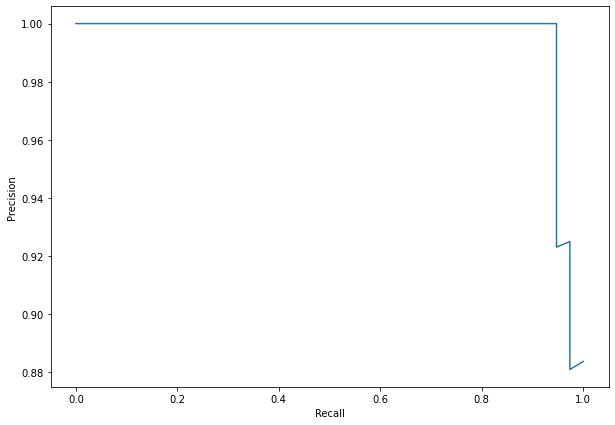

In [119]:
plt.figure(figsize=(10,7)) 
 
precision, recall, thresholds = precision_recall_curve(y_sub_val, y_sub_pred_probs)
plt.plot(recall, precision) 
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.show()

## 9. Finalize a threshold that will be used for predictions in relation to the test dataset.

In [120]:
PR_variation_df = pd.DataFrame({'precision': precision, 'recall': recall}, index=list(thresholds)+[1]) 
PR_variation_df

,precision,recall
0.106719,0.883721,1.000000
0.223262,0.880952,0.973684
0.235024,0.902439,0.973684
0.241403,0.925000,0.973684
0.258981,0.923077,0.947368
0.478132,0.947368,0.947368
0.520737,0.972973,0.947368
0.557917,1.000000,0.947368
0.622766,1.000000,0.921053
0.635804,1.000000,0.894737


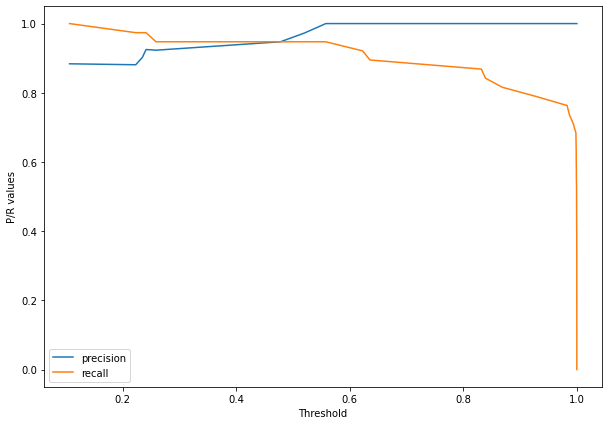

In [121]:
PR_variation_df.plot(figsize=(10,7)) 
plt.xlabel('Threshold') 
plt.ylabel('P/R values') 
plt.show() 

In [122]:
final_threshold = 0.05

## 10. Predict the final values on the test dataset.

In [123]:
pred_probs_test = np.array([x[1] for x in mlp.predict_proba(X_test)])
pred_test = (pred_probs_test > final_threshold).astype(int)
pred_test

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0])

In [124]:
print('Accuracy: {}'.format(accuracy_score(y_test, pred_test)))
print('Precision: {}'.format(precision_score(y_test, pred_test)))
print('Recall: {}'.format(recall_score(y_test, pred_test)))
print(confusion_matrix(y_test, pred_test))

Accuracy: 0.9385964912280702
Precision: 0.8723404255319149
Recall: 0.9761904761904762
[[66  6]
 [ 1 41]]
